In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
os.chdir("C:\\Users\\jelen\\Desktop\\ds\\data")

In [3]:
orders = pd.read_csv("olist_orders_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
cat_name_translation = pd.read_csv("product_category_name_translation.csv")
geo_df=pd.read_csv("olist_geolocation_dataset.csv")
sellers=pd.read_csv("olist_sellers_dataset.csv")

In [4]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [5]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [6]:
#Convert zip code column to a string object
sellers["seller_zip_code_prefix"] = sellers["seller_zip_code_prefix"].astype('str')

#Remove the prefix from the xip_code column name
sellers.rename(columns = {"seller_zip_code_prefix" : "seller_zipcode"}, inplace=True)

In [7]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
#Convert customer_zip_code_prefix column to string
customers["customer_zip_code_prefix"] = customers["customer_zip_code_prefix"].astype('str')

#Remove the prefix from the xip_code column name
customers.rename(columns = {"customer_zip_code_prefix" : "customer_zipcode"}, inplace=True)

In [10]:
cat_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
#Review the shape and profile of the products df
cat_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [12]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [13]:
#Review the shape and profile of the orders df
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [14]:
#Update timestamp columns to the correct datatype
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [15]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [16]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [17]:
#Convert order_item_id to string object
order_items["order_item_id"] = order_items['order_item_id'].astype('str')

#Convert shipping_limit_date to datetime
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"])

In [18]:
#Compute delivery time
avg_delivery_time= (orders["order_delivered_customer_date"] - orders["order_delivered_carrier_date"]).mean()
avg_delivery_time

Timedelta('9 days 07:55:59.254148743')

In [19]:
# Compute delivery duration in days and hours for all orders
orders["delivery_duration"] = (orders["order_delivered_customer_date"] - orders["order_delivered_carrier_date"])
orders["delivery_hours"] = orders["delivery_duration"]/ dt.timedelta(hours=1)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,delivery_hours
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,145.503611
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45,288.945833
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29,220.274722
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43,226.811944
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28,46.507778


In [20]:
#What is average delivery time per region?

# Join the datasets on their common columns
merged_data = pd.merge(orders, order_items, on='order_id')
merged_data = pd.merge(merged_data, customers, on='customer_id')

merged_data['delivery_time'] = merged_data['order_delivered_customer_date'] - merged_data['order_approved_at']
merged_data['delivery_time'] = merged_data['delivery_time'].dt.days

# Group the data by region and calculate the average delivery time
avg_delivery_time = merged_data.groupby('customer_state')['delivery_time'].mean()

print(avg_delivery_time)


customer_state
AC    19.692308
AL    23.489461
AM    25.533742
AP    27.000000
BA    18.262558
CE    20.030877
DF    12.043312
ES    14.714157
GO    14.393939
MA    20.579474
MG    11.062258
MS    14.626387
MT    16.919961
PA    22.760911
PB    19.484642
PE    17.337915
PI    18.479924
PR    10.988848
RJ    14.270098
RN    18.399232
RO    18.739927
RR    27.413043
RS    14.181047
SC    14.028306
SE    20.552000
SP     7.819717
TO    16.432258
Name: delivery_time, dtype: float64


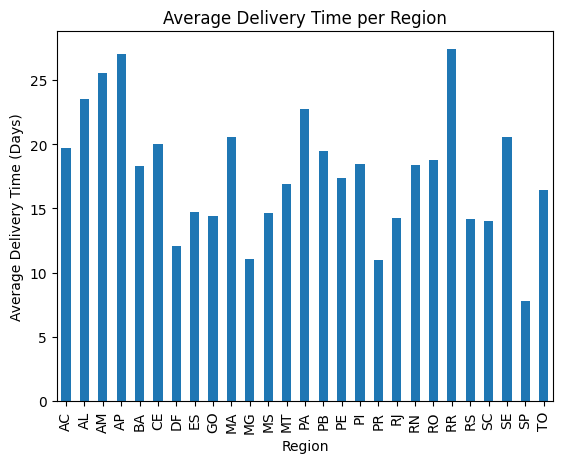

In [21]:
# Create a bar plot of the average delivery time per region
avg_delivery_time.plot(kind='bar', xlabel='Region', ylabel='Average Delivery Time (Days)', title='Average Delivery Time per Region')
plt.show()

In [22]:
#What are the regions with high profitability?

# Join the datasets on their common columns
merged_data = pd.merge(orders, order_items, on='order_id')
merged_data = pd.merge(merged_data, customers, on='customer_id')

# Calculate the total revenue for each order
merged_data['revenue'] = merged_data['price'] * merged_data['freight_value']

# Calculate the total revenue for each customer
total_revenue = merged_data.groupby('customer_id')['revenue'].sum()

# Join the total revenue back to the merged data
merged_data = pd.merge(merged_data, total_revenue, on='customer_id')

# Group the data by region and calculate the average revenue per customer for each region
avg_revenue_per_customer = merged_data.groupby('customer_state')['revenue_y'].mean()

# Sort the regions by average revenue per customer in descending order
sorted_regions = avg_revenue_per_customer.sort_values(ascending=False)

print(sorted_regions)


customer_state
PB    15752.975119
TO    10707.946310
PI    10134.456208
RO    10059.644969
RR     9959.887381
PA     9487.406294
AC     9430.885821
AL     9387.081179
MA     9228.125689
AP     9196.226227
SE     8986.234918
MT     8602.737041
PE     8294.578026
CE     8205.962085
AM     7862.156377
RN     7849.058345
MS     7505.785895
BA     6583.113008
GO     5616.334221
SC     5168.501226
ES     4878.310386
DF     4694.641359
RS     4599.478817
RJ     4557.978457
PR     4501.356899
MG     4273.326679
SP     2995.150738
Name: revenue_y, dtype: float64


In [23]:
#What are the regions with low profitability?

# Join the datasets on their common columns
merged_data = pd.merge(orders, order_items, on='order_id')
merged_data = pd.merge(merged_data, customers, on='customer_id')

# Calculate the total revenue for each order
merged_data['revenue'] = merged_data['price'] * merged_data['freight_value']

# Calculate the total revenue for each customer
total_revenue = merged_data.groupby('customer_id')['revenue'].sum()

# Join the total revenue back to the merged data
merged_data = pd.merge(merged_data, total_revenue, on='customer_id')

# Group the data by region and calculate the average revenue per customer for each region
avg_revenue_per_customer = merged_data.groupby('customer_state')['revenue_y'].mean()

# Sort the regions by average revenue per customer in descending order
sorted_regions = avg_revenue_per_customer.sort_values(ascending=True)

print(sorted_regions)

customer_state
SP     2995.150738
MG     4273.326679
PR     4501.356899
RJ     4557.978457
RS     4599.478817
DF     4694.641359
ES     4878.310386
SC     5168.501226
GO     5616.334221
BA     6583.113008
MS     7505.785895
RN     7849.058345
AM     7862.156377
CE     8205.962085
PE     8294.578026
MT     8602.737041
SE     8986.234918
AP     9196.226227
MA     9228.125689
AL     9387.081179
AC     9430.885821
PA     9487.406294
RR     9959.887381
RO    10059.644969
PI    10134.456208
TO    10707.946310
PB    15752.975119
Name: revenue_y, dtype: float64


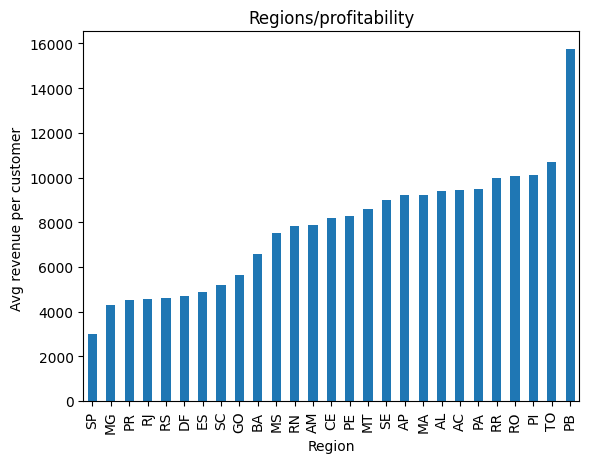

In [24]:
sorted_regions.plot(kind='bar', xlabel='Region', ylabel='Avg revenue per customer ', title='Regions/profitability')
plt.show()

In [25]:
##What are the regions with low delivery time?

# Join the datasets on their common columns
merged_data = pd.merge(orders, order_items, on='order_id')
merged_data = pd.merge(merged_data, customers, on='customer_id')

# Calculate the delivery time for each order
merged_data['delivery_time'] = pd.to_datetime(merged_data['order_delivered_customer_date']) - pd.to_datetime(merged_data['order_purchase_timestamp'])
merged_data['delivery_time'] = merged_data['delivery_time'].dt.days

# Group the data by region and calculate the average delivery time for each region
avg_delivery_time = merged_data.groupby('customer_state')['delivery_time'].mean()

# Sort the regions by average delivery time in ascending order
sorted_regions = avg_delivery_time.sort_values(ascending=True)

print(sorted_regions)


customer_state
SP     8.259609
PR    11.480793
MG    11.515522
DF    12.501486
SC    14.520986
RJ    14.689382
RS    14.708299
GO    14.948177
MS    15.107275
ES    15.192809
TO    17.003226
MT    17.508197
PE    17.792096
BA    18.774640
RN    18.873321
PI    18.931166
RO    19.282051
PB    20.119454
AC    20.329670
CE    20.537167
SE    20.978667
MA    21.203750
PA    23.301708
AL    23.992974
AM    25.963190
AP    27.753086
RR    27.826087
Name: delivery_time, dtype: float64


In [26]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [27]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [28]:
#Convert review_creation_date and review_answer_timestamp to datetime objects
reviews["review_answer_timestamp"] = pd.to_datetime(reviews["review_answer_timestamp"])
reviews["review_creation_date"] = pd.to_datetime(reviews["review_creation_date"])


In [29]:
#Create master orders_df
orders_df = orders.merge(order_items, on="order_id") \
    .merge(reviews, on="order_id")

#Review orders dataset
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,delivery_hours,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,145.503611,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45,288.945833,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29,220.274722,...,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43,226.811944,...,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28,46.507778,...,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17,2018-02-18 13:02:51


In [30]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [31]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [32]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [33]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [34]:
#Renaming the product_name_lenght and product_description_lenght columns
products.rename(columns={"product_name_lenght":"product_name_length", "product_description_lenght":"product_description_length"}, inplace=True)
products.columns

Index(['product_id', 'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [35]:
#Descriptive analytics of Products table
products.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [36]:
#Define a function to replace missing rows in columns
def replace_null(df, col):
    if df[col].dtypes == "object":
        df[col] = np.where(df[col].isnull(), "unknown", df[col]) #replace missing rows in a categorical column with unkownn
    else:
        median = df[col].median()
        df.loc[df[col].isnull(), col] = median #missing rows in a numerical column with the median values
    return df

In [37]:
#Create a list of column names
col_null_values = ["product_category_name", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]

#Apply replace null function
for c in col_null_values:
    replace_null(products, c)

In [38]:
#Check for null values
products.isna().sum()

product_id                      0
product_category_name           0
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

In [39]:
#Create master products dataframe with products and product_cat
products_df = products.merge(cat_name_translation, on="product_category_name")
products_df.sample(10)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
23370,a396b88f085aa34d30a1405fd4f80140,eletronicos,58.0,100.0,2.0,450.0,16.0,16.0,11.0,electronics
466,65cee62426275381ec64d04922ee8a22,perfumaria,47.0,303.0,1.0,350.0,19.0,24.0,16.0,perfumery
19828,bb5f7cb699fd0467c5d6289669df9510,malas_acessorios,48.0,991.0,10.0,3050.0,52.0,32.0,19.0,luggage_accessories
10274,5facbcb58026ecb23eab5777adf310fa,moveis_decoracao,56.0,428.0,1.0,2150.0,35.0,25.0,35.0,furniture_decor
20042,6c3f9c870ff6e96ad4f4511602078fb0,malas_acessorios,59.0,318.0,3.0,5750.0,17.0,48.0,42.0,luggage_accessories
12569,c33d78b97260227119fb2b71be168fca,cama_mesa_banho,39.0,170.0,1.0,650.0,27.0,10.0,22.0,bed_bath_table
12166,9036be77e0a74cca6eeef0740649b97b,brinquedos,57.0,697.0,3.0,405.0,21.0,7.0,15.0,toys
23464,c37e775cc9f2dd910db751444447fa3d,eletronicos,57.0,810.0,1.0,150.0,19.0,14.0,19.0,electronics
10581,986d0d7a45258d4b8be60463fcff39f6,moveis_decoracao,63.0,462.0,2.0,8050.0,80.0,10.0,60.0,furniture_decor
27811,25115416bba55bd33ecccbc480ec7a81,relogios_presentes,57.0,349.0,3.0,300.0,16.0,8.0,11.0,watches_gifts


In [40]:
#Drop unnecessary columns from products_df
products_df.drop(columns=["product_name_length", "product_description_length", "product_photos_qty", "product_category_name"], inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32328 entries, 0 to 32327
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32328 non-null  object 
 1   product_weight_g               32328 non-null  float64
 2   product_length_cm              32328 non-null  float64
 3   product_height_cm              32328 non-null  float64
 4   product_width_cm               32328 non-null  float64
 5   product_category_name_english  32328 non-null  object 
dtypes: float64(4), object(2)
memory usage: 1.7+ MB


In [41]:
#Create Master df
Master_df = orders_df.merge(payments, on="order_id") \
    .merge(customers, on='customer_id') \
        .merge(products_df, on ="product_id") \
            .merge(sellers, on="seller_id")

In [42]:
#Confirm shape and datatype of master df
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       115609 non-null  object         
 1   customer_id                    115609 non-null  object         
 2   order_status                   115609 non-null  object         
 3   order_purchase_timestamp       115609 non-null  datetime64[ns] 
 4   order_approved_at              115595 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   114414 non-null  datetime64[ns] 
 6   order_delivered_customer_date  113209 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  115609 non-null  datetime64[ns] 
 8   delivery_duration              113208 non-null  timedelta64[ns]
 9   delivery_hours                 113208 non-null  float64        
 10  order_item_id                  115609 non-null  object  

In [43]:
#Top sales by State
TopSales_state = Master_df.groupby(["customer_state"]).agg({"payment_value":"sum"})
TopSales_state.sort_values(ascending=False, by="payment_value")[:10].reset_index()

,customer_state,payment_value
0,SP,7502926.95
1,RJ,2708839.33
2,MG,2288949.71
3,RS,1131899.22
4,PR,1055747.81
5,BA,780334.54
6,SC,769744.94
7,GO,459466.06
8,DF,430126.51
9,ES,390840.58


In [44]:
#Top sales by product category per state and city.
TopProduct_city = Master_df.groupby(["customer_state", "customer_city", "product_category_name_english"]).agg({"payment_value":"sum", "order_item_id":"count"})
TopProduct_city = TopProduct_city.sort_values(ascending=False, by="payment_value")[:13].reset_index()
TopProduct_city

,customer_state,customer_city,product_category_name_english,payment_value,order_item_id
0,SP,sao paulo,bed_bath_table,295685.33,2172
1,SP,sao paulo,computers_accessories,288500.24,1256
2,SP,sao paulo,health_beauty,263482.10,1792
3,SP,sao paulo,watches_gifts,194797.90,861
4,SP,sao paulo,sports_leisure,192716.46,1462
5,SP,sao paulo,furniture_decor,192627.46,1357
6,SP,sao paulo,housewares,165754.91,1397
7,RJ,rio de janeiro,bed_bath_table,127026.50,907
8,RJ,rio de janeiro,fixed_telephony,112491.22,24
9,RJ,rio de janeiro,sports_leisure,107840.56,606


Text(0, 0.5, 'Sales')

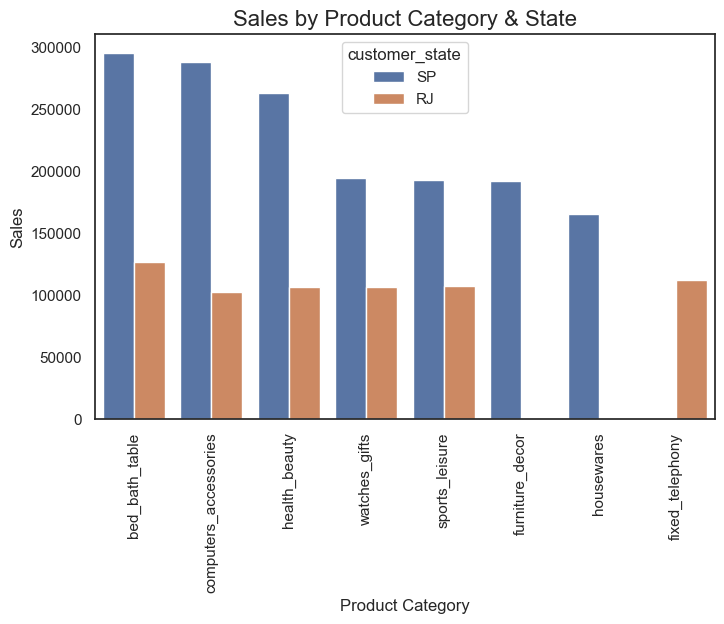

In [45]:
#Plot top saless by state and product category
plt.figure(figsize=(8,5))

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.barplot(x="product_category_name_english", y='payment_value', hue = "customer_state", data=TopProduct_city)

#Rotate x_axis labels
plt.xticks(rotation=90)

#add overall title
plt.title('Sales by Product Category & State', fontsize=16)

#add axis titles
plt.xlabel('Product Category')
plt.ylabel('Sales')

In [46]:
# Lets look at the top customers by the total order items

TopOrders_customer = Master_df.groupby(["customer_id", "customer_state", "customer_city"]).agg({"order_item_id":"count"})
Top_buying_customers = TopOrders_customer.sort_values(ascending=False, by="order_item_id")[:10].reset_index()
Top_buying_customers

,customer_id,customer_state,customer_city,order_item_id
0,270c23a11d024a44c896d1894b261a83,SP,sao paulo,63
1,13aa59158da63ba0e93ec6ac2c07aacb,RJ,rio de janeiro,38
2,9af2372a1e49340278e7c1ef8d749f34,MT,cuiaba,29
3,92cd3ec6e2d643d4ebd0e3d6238f69e2,SP,sao paulo,26
4,63b964e79dee32a3587651701a2b8dbf,SP,atibaia,24
5,d22f25a9fadfb1abbc2e29395b1239f4,MT,sinop,24
6,2ba91e12e5e4c9f56b82b86d9031d329,SP,suzano,24
7,86cc80fef09f7f39df4b0dbce48e81cb,RS,itaqui,24
8,6ee2f17e3b6c33d6a9557f280edd2925,SP,guarulhos,24
9,b246eeed30b362c09d867b9e598bee51,SP,tupa,22


In [47]:
# Lets look at the top buying customers by the amount they spend
Top_buying_customers = Master_df.groupby(["customer_id", "customer_city", "customer_state"]).agg({"payment_value":"sum", "order_item_id":"count"})
Top_buying_customers = Top_buying_customers.sort_values(ascending=False, by="payment_value")[:10].reset_index()
Top_buying_customers

,customer_id,customer_city,customer_state,payment_value,order_item_id
0,1617b1357756262bfa56ab541c47bc16,rio de janeiro,RJ,109312.64,8
1,be1b70680b9f9694d8c70f41fa3dc92b,sao paulo,SP,44048.00,20
2,05455dfa7cd02f13d132aa7a6a9729c6,divinopolis,MG,36489.24,6
3,1ff773612ab8934db89fd5afa8afe506,rio de janeiro,RJ,30186.00,10
4,ec5b2ba62e574342386871631fafd3fc,vila velha,ES,29099.52,4
5,e7d6802668de6e74d0d6c56565bf2a24,sao paulo,SP,22346.60,10
6,8c20d9bfbc96c5d39025d77a3ba83d7f,cicero dantas,BA,21874.05,11
7,f7622098214b4634b7fe7eee269b5426,campo novo do parecis,MT,19457.04,6
8,71901689c5f3e5adc27b1dd16b33f0b8,sao luis,MA,19174.38,6
9,be1c4e52bb71e0c54b11a26b8e8d59f2,sao paulo,SP,18786.90,22


In [48]:
#Lets review the Top10 products by total sales
Top10_products = Master_df.groupby("product_category_name_english").agg({"payment_value":"sum", "order_id":"nunique", "order_item_id":"count"})
Top10_products = Top10_products.sort_values(ascending=False, by=["payment_value"])[:10].reset_index()
Top10_products

,product_category_name_english,payment_value,order_id,order_item_id
0,bed_bath_table,1725465.67,9313,11847
1,health_beauty,1646292.53,8770,9944
2,computers_accessories,1592611.66,6649,8105
3,furniture_decor,1427214.01,6398,8743
4,watches_gifts,1420682.17,5576,6161
5,sports_leisure,1390581.87,7669,8942
6,housewares,1091709.15,5843,7331
7,garden_tools,834757.45,3496,4558
8,auto,802254.74,3877,4356
9,cool_stuff,772616.70,3599,3964


In [49]:
#Top10 products by average sales and orders
Avg10_products = Master_df.groupby("product_category_name_english").agg({"payment_value":"mean", "order_item_id":"count"})
Avg10_products = Avg10_products.sort_values(ascending=False, by="payment_value")[:10].reset_index()
Avg10_products

,product_category_name_english,payment_value,order_item_id
0,computers,1244.453502,217
1,fixed_telephony,767.301152,269
2,small_appliances_home_oven_and_coffee,656.786154,78
3,agro_industry_and_commerce,471.153214,252
4,home_appliances_2,464.267313,268
5,office_furniture,364.313553,1773
6,signaling_and_security,343.163166,199
7,construction_tools_safety,331.549495,198
8,musical_instruments,323.607177,712
9,small_appliances,321.246423,699


In [50]:
#Top10 worst reviews by product category
Toprev_products = Master_df.groupby("product_category_name_english").agg({"review_score": "mean"})
Toprev_products = Toprev_products.sort_values(ascending=True, by="review_score")[:10].reset_index()
Toprev_products

,product_category_name_english,review_score
0,security_and_services,2.500000
1,diapers_and_hygiene,3.256410
2,office_furniture,3.526791
3,fashion_male_clothing,3.548611
4,home_comfort_2,3.642857
5,fixed_telephony,3.672862
6,fashio_female_clothing,3.780000
7,furniture_mattress_and_upholstery,3.804878
8,audio,3.840849
9,furniture_bedroom,3.841270


Text(0, 0.5, 'Review Score')

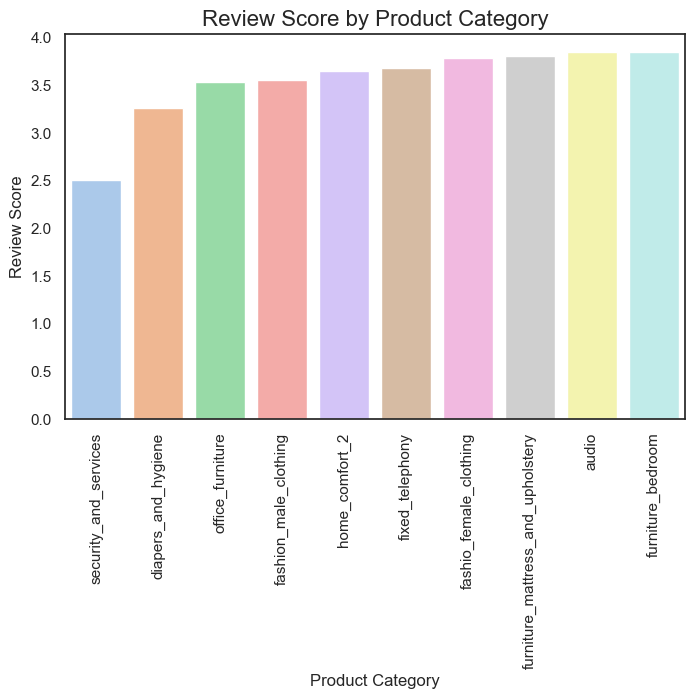

In [51]:
#Plot avg. review score by product category
plt.figure(figsize=(8,5))

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set_palette("pastel")

#create grouped bar chart
sns.barplot(x="product_category_name_english", y='review_score', data=Toprev_products,errorbar=None)

#Rotate x_axis labels
plt.xticks(rotation=90)

#add overall title
plt.title('Review Score by Product Category', fontsize=16)

#add axis titles
plt.xlabel('Product Category')
plt.ylabel('Review Score')

In [52]:
#Top products with shortest delivery time
Topdel_products = Master_df.groupby("product_category_name_english").agg({"review_score":"mean", "price":"mean", "order_item_id":"count", "delivery_duration":"mean", "delivery_hours":"mean"})
Topdel_products = Topdel_products.sort_values(ascending=True, by="delivery_duration")[:10].reset_index()
Topdel_products

,product_category_name_english,review_score,price,order_item_id,delivery_duration,delivery_hours
0,arts_and_craftmanship,4.125000,75.583750,24,3 days 14:03:54.166666666,86.065046
1,books_imported,4.419355,78.255645,62,5 days 14:10:06.372881355,134.168437
2,la_cuisine,4.133333,144.465333,15,5 days 20:37:25.600000,140.623778
3,construction_tools_lights,4.065574,134.875836,305,6 days 05:42:10.751655629,149.702987
4,diapers_and_hygiene,3.256410,40.194615,39,6 days 15:59:04.540540540,159.984595
5,party_supplies,3.847826,103.373478,46,6 days 20:04:38.133333333,164.077259
6,fashion_childrens_clothes,4.500000,71.231250,8,6 days 22:50:01,166.833611
7,small_appliances_home_oven_and_coffee,4.320513,627.509103,78,7 days 02:02:57.200000,170.049222
8,drinks,4.044271,59.483906,384,7 days 02:25:32.172506738,170.425603
9,fashio_female_clothing,3.780000,57.788800,50,7 days 02:36:09.347826087,170.602597


In [53]:
#Top product categories by sellers, and customers
Top_sellersproduct = Master_df.groupby("product_category_name_english").agg({"seller_id":"nunique", "customer_id":"nunique"})
Top_sellersproduct.reset_index().sort_values(by="seller_id", ascending=False)[:20]

,product_category_name_english,seller_id,customer_id
43,health_beauty,491,8770
65,sports_leisure,481,7669
49,housewares,467,5843
5,auto,382,3877
39,furniture_decor,370,6398
15,computers_accessories,287,6649
20,cool_stuff,264,3599
69,toys,251,3853
6,baby,242,2861
42,garden_tools,235,3496
